In [19]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import os

In [20]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [21]:
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [36]:
class_names = ["Pizza", "Steak"]

In [22]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [23]:
# os.remove("pizza_steak/train/pizza/166823.jpg")
# os.remove("pizza_steak/train/pizza/1234172.jpg")

In [24]:
train_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen_augm = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
IMAGE_SIZE = (224,224)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

train_data_augm = train_datagen_augm.flow_from_directory(
    directory=train_dir,
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=32
)

Found 1498 images belonging to 2 classes.
Found 1498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [27]:
images, labels = train_data_augm.next()

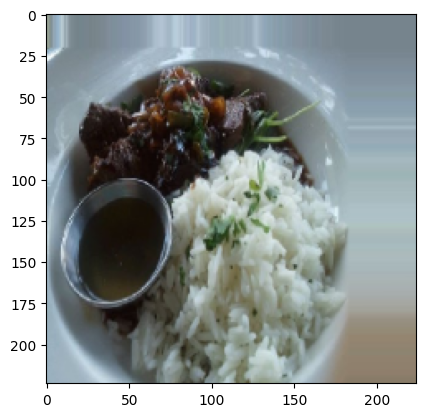

In [28]:
plt.imshow(images[5])

In [29]:
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [30]:
model_bl = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_bl.compile(optimizer=Adam(),
                 loss=tf.keras.losses.binary_crossentropy,
                 metrics=["accuracy"])

history_bl = model_bl.fit(combine_gen(train_data, train_data_augm),
            batch_size=32,
            epochs=10,
            validation_data=test_data,
            validation_batch_size=32,
            steps_per_epoch=47*2)

Epoch 1/10
64/64 [==============================] - 19s 285ms/step - loss: 0.6498 - accuracy: 0.6167 - val_loss: 0.5713 - val_accuracy: 0.7120
Epoch 2/10
64/64 [==============================] - 17s 276ms/step - loss: 0.5243 - accuracy: 0.7436 - val_loss: 0.3817 - val_accuracy: 0.8440
Epoch 3/10
64/64 [==============================] - 17s 265ms/step - loss: 0.4540 - accuracy: 0.7888 - val_loss: 0.3535 - val_accuracy: 0.8480
Epoch 4/10
64/64 [==============================] - 18s 291ms/step - loss: 0.4182 - accuracy: 0.8198 - val_loss: 0.3236 - val_accuracy: 0.8580
Epoch 5/10
64/64 [==============================] - 17s 267ms/step - loss: 0.4133 - accuracy: 0.8168 - val_loss: 0.3326 - val_accuracy: 0.8660
Epoch 6/10
64/64 [==============================] - 21s 330ms/step - loss: 0.3856 - accuracy: 0.8330 - val_loss: 0.2897 - val_accuracy: 0.8760
Epoch 7/10
64/64 [==============================] - 16s 257ms/step - loss: 0.4072 - accuracy: 0.8223 - val_loss: 0.2929 - val_accuracy: 0.8780

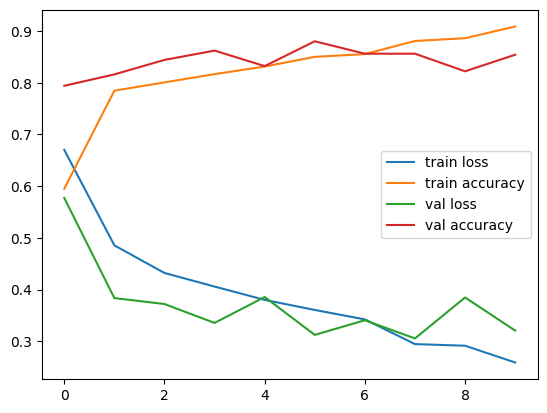

In [12]:
#plt.figure(figsize=(9,4))

#ax = plt.subplot(1,2,1)
#ax.set_title("train")
plt.plot(history_bl.epoch, history_bl.history["loss"], label="train loss")
plt.plot(history_bl.epoch, history_bl.history["accuracy"], label="train accuracy")
plt.plot(history_bl.epoch, history_bl.history["val_loss"], label="val loss")
plt.plot(history_bl.epoch, history_bl.history["val_accuracy"], label="val accuracy")
plt.legend()

# ax = plt.subplot(1,2,2)
# ax.set_title("validation")
# ax.plot(history_bl.epoch, history_bl.history["val_loss"], label="loss")
# ax.plot(history_bl.epoch, history_bl.history["val_accuracy"], label="accuracy")
# plt.legend()

### Making Predictions

In [32]:
def load_and_prep_image(filename, img_shape=224):
  # read file
  img = tf.io.read_file(filename)
  # decode the read file into tensor
  img = tf.image.decode_image(img)
  # resize
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale
  img = img/255.
  return img


In [37]:
pred = model_bl.predict(tf.expand_dims(pizza, axis=0))

1/1 [==============================] - 0s 18ms/step


In [39]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'Pizza'

In [40]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 41ms/step


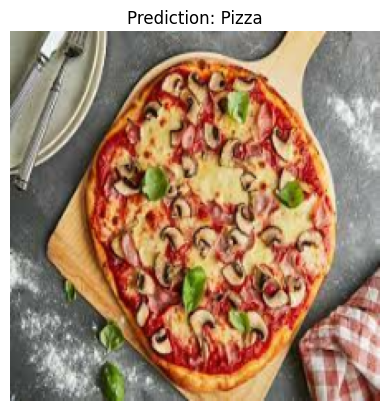

In [41]:
pred_and_plot(model_bl, "download.jpg")